# End-to-End Machine Learning Project

## Main steps: 

1) Look at the big picture<br>
2) Get the data<br>
3) Discover and visualize the data to gain insights<br>
4) Prepare the data for Machine Learning algorithms<br>
5) Select a model and train it<br>
6) Fine-tune the model<br>
7) Present solution <br>
8) Launch, monitor, and maintain system<br>

# Big Picture

Learn from US census data to predict median housing price in any district

## Frame the problem

How does the company expect to use and benefit from this model? 

**Pipeline** - A sequence of data processing components

What does the current solution look like? (if any)

**Q**: Is this supervised, unsupervised, or reinforcement learning? is it classification, regression, or something else? batch learning or online learning techniques? 


**A**: This is a supervised (since we have *labeled* data) regression (predicting a numerical value) problem. Specificly a multiple regression problem since there are multiple independent variables. This is a **univariate regression** problem (onely a single value for each district). **multivariate** = predict multiple dependent variables. Plain batch learning will work since this is a small dataset and not updating. 

- If the dataset is huge: split batch learning across multiple servers (using **MapReduce**) or use online learning techniques 

## Select a Performance Measure

Typical performance measure for regression problems: 

- Root Mean Square Error (RMSE) 
$$\mbox{RMSE}(\mathbf{X},h) = \sqrt{\frac{1}{m}\sum_{i=1}^{m}{(h(\mathbf{x}^{(i)}) - y^{(i)})^2}}$$

    - $m$ = number of samples
    - $\mathbf{x}^{(i)}$ = vector of all feature values (excluding label) of the ith instance, $y^{(i)}$ = label (desired output)
    - $\mathbf{X}$ is a matrix containing all the feature values. One row per instance, ith row = transpose of $\mathbf{x}^{(i)}$
    - $h$ = prediction function (hypothesis). predicted value: $\hat{y}^{(i)} = h(\mathbf{x}^{(i)})$
    - $\mbox{RMSE}(\mathbf{X},h)$ = cost function measured on set of samples using the hypothesis $h$
    
RMSE is generally preferred. In case of many outliers, consider using **Mean Absolute Error**

$$\mbox{MAE}(\mathbf{X},h) = \frac{1}{m}\sum_{i=1}^{m}{\lvert h(\mathbf{x}^{(i)}) - y^{(i)} \rvert}$$

- Both of these measure the distance between vectors<br> 
<br>
- **RMSE** = **Euclidean Norm** = $\ell_{2}$ norm = $\lVert \cdot \rVert_{2}$ = $\lVert \cdot \rVert$
- **MAE** = **Manhattan norm** (measure the distance if you can only travel along orthogonal city blocks) = $\ell_{1}$ norm = $\lVert \cdot \rVert_{1}$<br>
<br>
- The $\ell_{k}$ norm = $\lVert \mathbf{v} \rVert_{k} = (\lvert v_0 \rvert^k + \lvert v_1 \rvert^k + ... + \lvert v_n \rvert^k)^{\frac{1}{k}}$<br>
- $\ell_{0}$ = number of nonzero elements in the vector
- $\ell_{\infty}$ = maximum absolute value

- higher norm index = focuses on large values and neglects small ones

## Check the assumptions (all ok)

# Download the data

In [3]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH): 
    if not os.path.isdir(housing_path): 
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

Import the data

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Make a histogram of numerical attributes

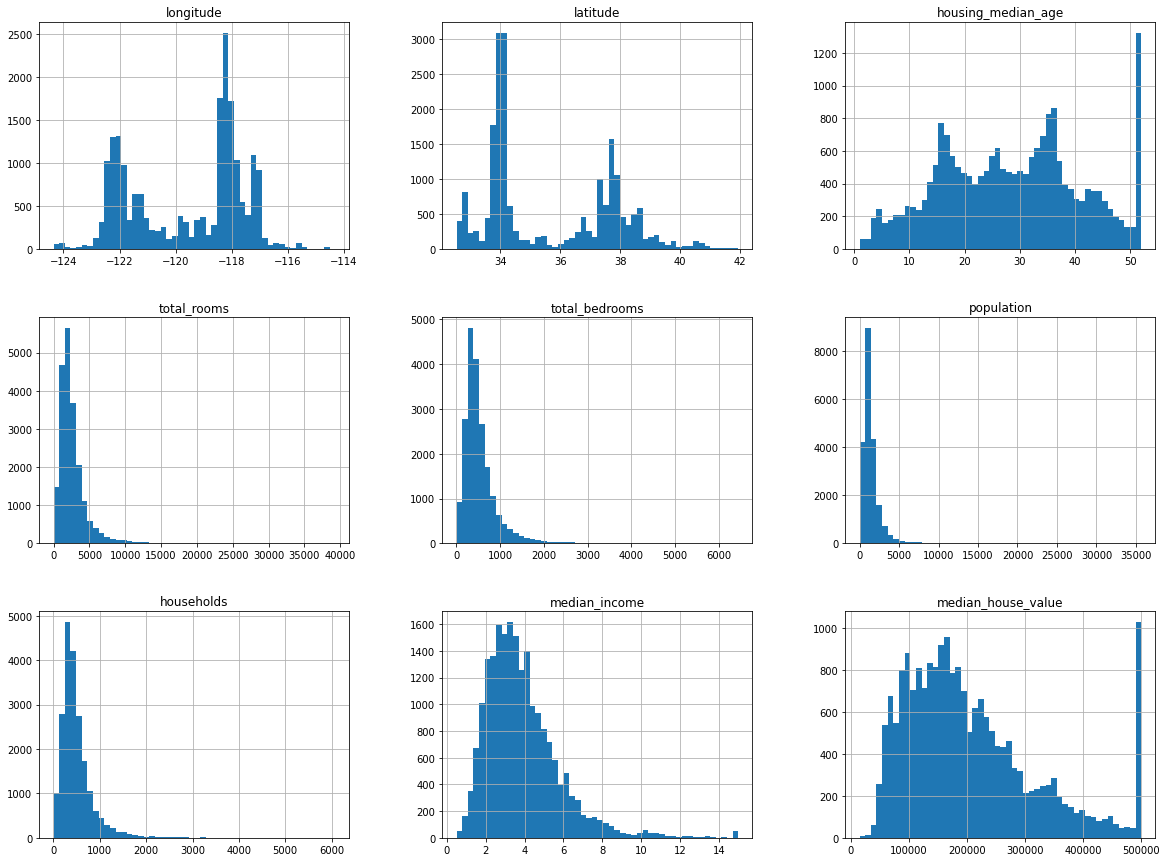

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

## Notes

- Median income has been scaled and capped at 15 for higher median incomes, and 0.5 for lower median incomes. They represent roughly tens of thousands of dollars (e.g. 3 = \$30,000)
- Housing median age and value were capped. The value may be a problem, since those are the target attributes & the model may learn that median value never goes above a certain number
    - Option 1: collect proper labels
    - Option 2: remove the capped districts from training and test set
- The attributes have very different scales 
- Many attributes are tail heavy 

**TO READ:** https://towardsdatascience.com/cross-validation-7c0163460ea0, https://towardsdatascience.com/train-test-split-c3eed34f763b

# Create a test set

**data snooping bias** - Accidentally stumble on an interesting pattern while doing EDA that is actually random, which reduces the performance of the model, or can also lead to incorrect model selection. 

In [11]:
import numpy as np

def split_train_test(data, test_ratio): 
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(housing, 0.2)

In [13]:
len(train_set)

16512

In [14]:
len(test_set)

4128

**problem**: if you run the function again, it will generate a different test set. Over time the whole dataset will be seen, which we need to avoid. <br> 
<br> 
**Solution 1**: save test set on first run, load it on subsequent runs<br> 
**Solution 2**: Fix the random number generator's seed so that the same indices are returned<br>
<br>
- both solutions will break when the dataset is updated<br>
<br>

**Solution 3**: use an id column to decide whether or not to throw it in the test set. Ex: compute a hash of each instances identifier and put it in the test set if it is <= 20% of maximum value. That way, the test set will contain 20% of all new instances but not any instance that was previously in the training set. <br>
<br>
**implementation**

In [15]:
from zlib import crc32

def test_set_check(identifier, test_ratio): 
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio*2**32

def split_train_test_by_id(data, test_ratio, id_column): 
    ids = data[id_column]
    
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

Add an identifier column to housing dataset

In [16]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [17]:
len(train_set)

16512

In [18]:
len(test_set)

4128

Caveats with using row index as id: make sure that new data is appended to the end of the dataset and no row ever gets deleted. 

If unable, find another unique and stable feature that can act as an id (e.g. some combo of latitude and longitude)

Scikit-Learn has a module that can split the data as well

In [19]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

This purely random sampling is fine for very large datasets (relative to number of attributes) **Q: What is a good rule of thumb for determining this?**. If not, run the risk of sampling bias. 

**Stratified sampling** - divide population into homogeneous groups, *strata*, and make sure the correct number of people from each strata are selected. 

Let's say we know beforehand that median income is a very important attribute. How do we ensure that the test set is representative of the whole dataset? Create an income category attribute. Don't use too many strata, and make sure that each group is large enough. 


<AxesSubplot:>

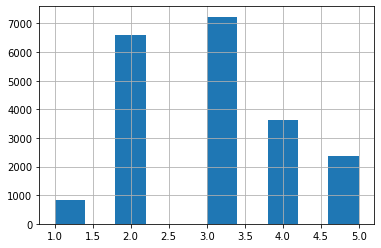

In [20]:
housing["income_cat"] = pd.cut(housing['median_income'], 
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                              labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

Now do stratified sampling based on income category

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]): 
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [22]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

<AxesSubplot:>

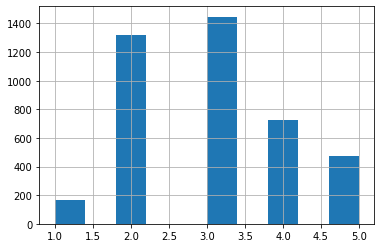

In [23]:
strat_test_set["income_cat"].hist()

Remove income_cat to get data back to original state

In [24]:
for set_ in (strat_train_set, strat_test_set): 
    set_.drop("income_cat", axis=1, inplace=True)

This step is often neglected in ML projects, will also be useful when talking about cross-validation

# Discover and Visualize the data to gain insights

Note: only do this step on the training set. We are NOT allowed to look at the test set to avoid bias. Maybe even make a dedicated exploration set to speed things up if the training set is very large. 

In [25]:
housing = strat_train_set.copy()

## Visualizing Geographical data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

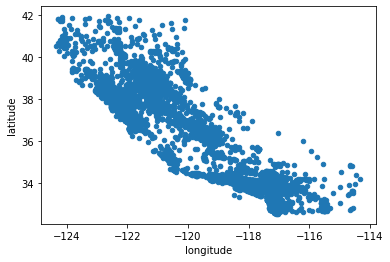

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

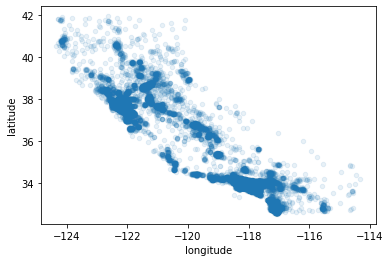

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Look at housing prices

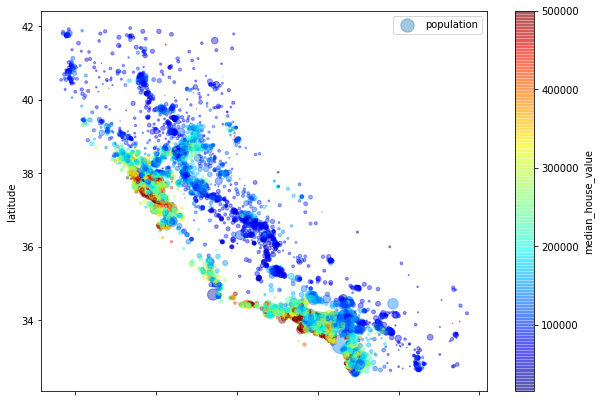

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/100, label="population", figsize=(10, 7), 
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

Housing prices are closely related to location and population density. Idea: use a clustering algorithm to detect main clusters and add new features that measure proximity to cluster centers. 

## Looking for Correlations

In [29]:
corr_matrix=housing.corr()

In [30]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [31]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

**Note**: Correlation coefficient only measure linear correlations- may completely miss nonlinear relationships

array([[<AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='population', ylabel='longitude'>,
        <AxesSubplot:xlabel='households', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='longitude'>],
       [<AxesSubplot:xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='population', ylabel='latitude'>,
        <AxesSubplot:xlabel='

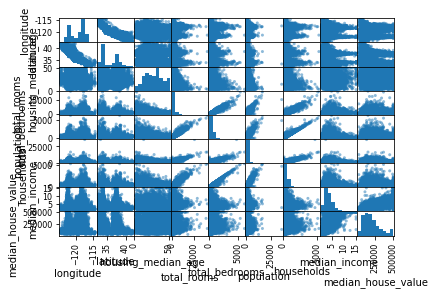

In [32]:
from pandas.plotting import scatter_matrix

scatter_matrix(housing)

Select only a few attributes to make this easier

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

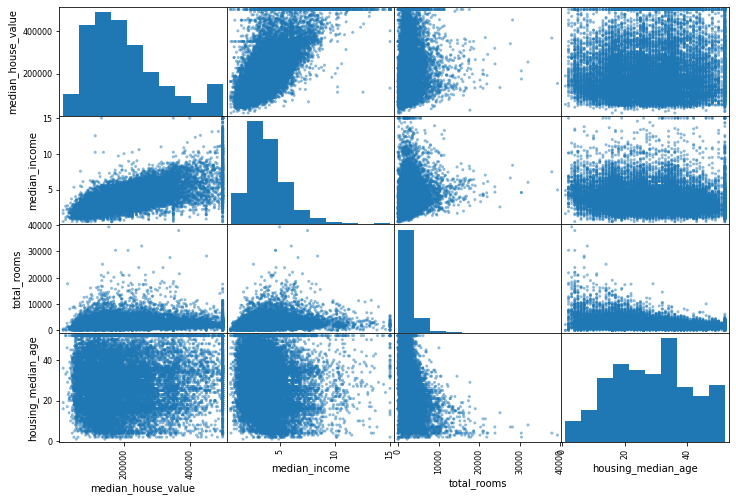

In [33]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

The diagonal plots are histograms of value counts

Zoom in on the correlation scatterplot on median house value vs median income

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

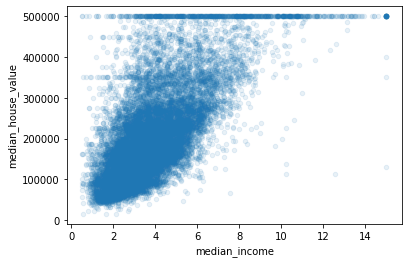

In [34]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

- Correlation is very strong
- price is capped
- weird horizontal lines around 450K, 350K, and 280K- may want to try removing these districts to prevent the algorithms from trying to reproduce these

## Experimenting with attribute combinations

ex: total number of rooms in the district is not useful, but total rooms per household is, same with number of bedrooms compared to the number of other rooms, and population per household. 

In [35]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [36]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='median_income'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='median_income'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='rooms_pe

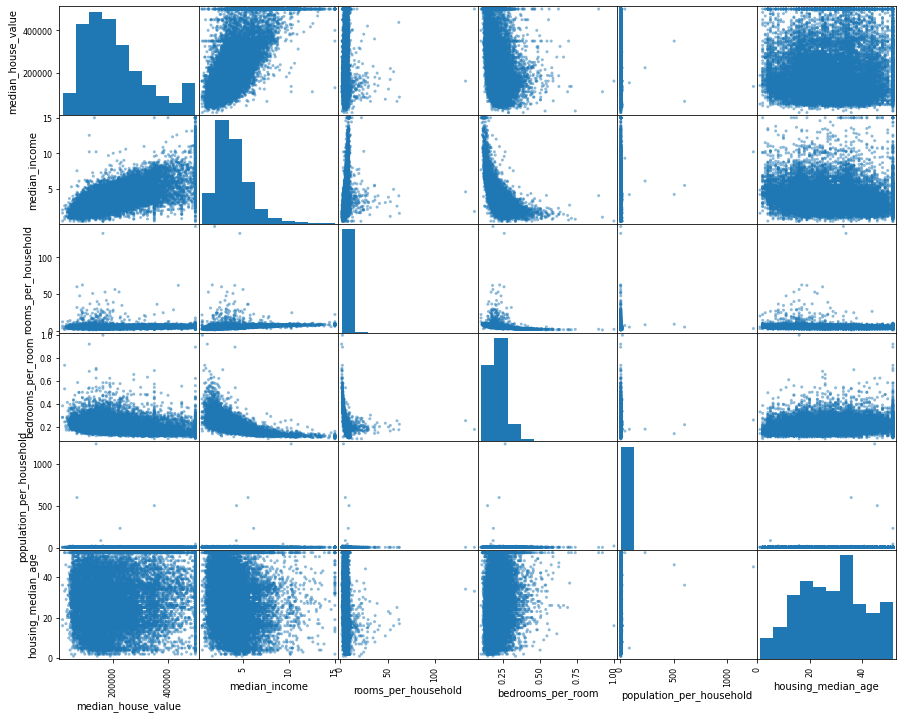

In [37]:
attributes = ["median_house_value", "median_income", "rooms_per_household",  "bedrooms_per_room", 
              "population_per_household", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(15, 12))

This kind of exploration does not have to be thorough- the point is to get a reasonably good prototype. Do further analysis after prototype is running. 

# Prepare data for machine learning algorithms

Write functions to do this for easy modification and reproducibility

Revert to a clean training set

Note: drop() creates a copy of the data, does not affect strat_train_set

In [38]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

**Data Cleaning**

Need to take care of missing values in total_bedrooms
1) Get ride of corresponding districts<br>
2) Get rid of whole attirbute<br>
3) set the values to some value (e.g. zero, mean, median, ect.)<br>

In [39]:
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median)

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
          ...  
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Length: 16512, dtype: float64

Scikit-Learn has a class for taking care of these things. `SimpleImputer`

First, create an instance

In [40]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

create a version of dataset without any text attirbutes

In [41]:
housing_num = housing.drop("ocean_proximity", axis=1)

Now fit the imputer

In [42]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

Imputer computed the median of each attirbute and stored the results. The imputer then works on all numerical attributes

In [43]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [44]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Use the trained imputer to transform training set by replacing the mssing values by the learned medians

In [45]:
X = imputer.transform(housing_num)

put it back into the dataframe

In [46]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

## Scikit-Learn Design: Main Principles

- **Consistency** - Everything has a consistent and simple interface
    - *Estimators* - any object that can estimate parameters. Estimation is performed by .fit()- takes only a dataset as a parameter. Any other parameter is a hyperparameter and must be set as an instance variable
    - *Transformers* - Some estimators can transform a dataset. fit_transform() calls fit() and then transform(). 
    - *Predictors* - some estimators can make predictions. predict() method returns the predictions. score() measures the qualities given the test set. 
    
- **Inspection** - hyperparameters are available via public instance variables. Learned parameters are public instance variables with an underscore suffix. 

- **Composition** - Existing building blocks are reused as much as possible

- **Sensible defaults** - most parameters have sensible defaults to quickly create baseline systems

## Handling Text and Categorical Attributes

In [47]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


Most ML algorithms prefer numbers- convert those categories from text to numbers using OrdinalEncoder class

In [48]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

Get the categories from the encoder

In [49]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Problem: the algorithm will assume 2 nearby numbers are similar, when based on the categories they are not. Use 1 hot encoding to fix this

In [50]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

For large number of possible categories, can replace with a numerical feature, or replace with a learnable low-dimension al vector (*embedding*)

## Custom Transformers

Can write custom transformers for custom cleanup and preparation

Sklearn relies on duck-typing (not inheritance). Create a class and implement 3 methods: `fit()` (returning self), `transform()` and `fit_transform()`. can get last one by adding `TransformerMixin` as a base class. Adding `BaseEstimator` as a base class gives `get_params()` and `set_params()` , useful for hyperparameter tuning. 

Here is a small transformer class that adds the attirbutes from earlier

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin): 
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None): 
        return self # nothing to do 
    def transform(self, X, y=None): 
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room: 
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else: 
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attributes = attr_adder.transform(housing.values)

Add hyperparameter to any data prep step you're not 100% sure about. 

## Feature Scaling

ML algorithms normally don't perform well when attributes have different scales (e.g. 1-6 vs 6-39,320). Scaling target values is usually not required

*min-max scaling* = *normalization* = shift values to range from 0 to 1. use `MinMaxScaler`

*standardization* = fit the data to a standard normal distribution. Use `StandardScalar`

**Important**: Fit the scalers to the training data only (NOT THE FULL DATA SET).

## Transformation pipelines

`Pipeline` class: implements a series of transformations

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), 
    ('attribs_adder', CombinedAttributesAdder()), 
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

Takes a list of name / estimator pairs defining the sequence of steps. All but the last must be transformers (have a `fit_transform()` method. `num_pipeline.fit()` calls `fit_transform()` on each transformer until the final estimator, which just calls `fit()`. 

We can apply the the transformer to both numerical and categorical data at the same time now. 

In [53]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs), 
    ("cat", OneHotEncoder(), cat_attribs), 
])

housing_prepared = full_pipeline.fit_transform(housing)

Here, each tuple contains a name (can be anything), a transformer (or another pipeline), and an list of name (or indices) of columns that the transformer should be applied to. 

OneHotEncoder returns a sparse matrix -> when there's a mix of sparse and dense matrices, ColumnTransformer will estimate the density of the final matrix and return the most appropriate object. 

In [54]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

# Select and train a model 

## Training and evaluating on the training set

Start by training a linear regression model 

In [56]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Try it out on a few instances

In [57]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [58]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


The predictions aren't exactly accurate -> chekc the RMSE error

In [59]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

`median_housing_values` are typically between 120K and 265K, so this is pretty bad. This appears to be underfitting. 

options: <br> 
- select a more powerful model
- feed training algorithm with better features
- reduct constraints

Try a decision tree

In [60]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [61]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

This is likely bad overfitting.

## Better evaluation using cross-validation

you can use `train_test_split` to split the training set into a smaller training and validation set. Alternative: use K-fold cross validation. 

This next section will split the training set into 10 subsets (folds) and train and evaluate decision tree 10 times, each leaving out one of the folds for validation. 

In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

Cross validation expects a utility funciton (greater = better), so scoring function is a negative value

In [66]:
def display_scores(scores): 
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())
display_scores(tree_rmse_scores)

Scores:  [68842.72639779 65568.18634408 71790.23461605 69419.58569316
 71878.57480061 72960.02410764 70539.1445101  71733.36840935
 76081.77532078 68703.95747279]
Mean:  70751.75776723544
Standard Deviation:  2704.1528052732474


Comput cross-validation score for linear regression 

In [67]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard Deviation:  2731.6740017983484


Decision tree is overfitting so bad that it's performing worse than linear regression!

Try random forest

In [68]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [49362.04535536 47920.36436719 49769.32744262 52754.87214156
 49856.92639455 53419.94013063 48923.89033596 48178.5310752
 52786.00644038 50076.18392537]
Mean:  50304.80876088131
Standard Deviation:  1881.6262783805028


This is a little better!

Next best step is to try out as many models as possible and to shortlist 2-5 promising models. 

ideally, save every model you make- use `sklearn.externals.jobli`

# Fine-Tune you model

Methods for fine-tuning hyperparameters

## Grid Search

Manually fiddling with hyperparameters can get very tedious- so have sklearn do it for you!

**Leaving the next block commented as it would likely take a long time**

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = [
#     {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, 
#     {'boostrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
# ]

# forest_reg = RandomForestRegressor()

# grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
#                           scoring='neg_mean_squard_error', 
#                           return_train_score=True)

# grid_search.fit(housing_prepared, housing_labels)

A total of 18 combinations of hyperparameter values are tested here, and each model is trained 5 times -> so 90 rounds of training. 

Get the best combination of parameters: 

In [69]:
#grid_search.best_params_

Get the best estimator directly: 

In [70]:
#grid_search.best_estimator_

It is initialized with refit=True, once finding the best estimator, it retrains on the whole training set. 

Evaluation scores: 

In [71]:
#cvres = grid_search.cv_results_
#for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    #print(np.sqrt(-mean_score), params)

## Randomized Search

- this method works fine with just a few combinations
- if hyperparameter space is large, better to use `RandomizedSearchCV`- evaluates a given number of random combinations by selecting a random value for each hyperparameter

## Ensembe methods

- combine models that perform the best

## Analyze the best models and their errors

- inspect the best models to get insights on the problem

Indicate the relative importance of each attribute

In [72]:
# feature_importances = grid_search.best_estimator_.feature_importances_
# feature_importances

In [73]:
# extra attribs = ["rooms_per_household", "pop_per_household", "bedrooms_per_household"]
# cat_endocder = full_pipeline.named_transformers_["cat"]
# cat_one_hot_attribs = list(cat_encoder.categories_[0])
# attributes = num_attributes + extra_attribs + cat_one_hot_attribs
# sorted(zip(feature_importances, attributes), reverse=True)

Try looking at specific errors as well- and understand why they're there and how to fix them. 

## Evaluate system on test set

Now evaluate the final model on the test set. call the pipeline's `transform()` method, NOT `fit_transform()` and evaluate the model  

In [74]:
# final_model = grid_search.best_estimator_

# X_test = strat_test_set.drop("median_house_value", axis=1)
# y_test = strat_test_set["median_house_value"].copy()

# X_test_prepared = full_pipeline.transform(X_test)

# final_predictions = final_model.predict(X_test_prepared)

# final_mse = mean_squared_error(y_test, final_predictions)
# final_rmse = np.sqrt(final_mse)

Sometimes this kind of generalization error won't be enough. Get an idea of how precise this estimate is

In [75]:
# from scipy import stats
# confidence = 0.95
# squared_errors = (final_predictions - y_test) ** 2
# np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, 
#                          loc=squared_errors.mean(), 
#                          scale=stats.sme(squared_errors)))

Performance is usually slightly worse that when measured using cross-validation. DO NOT tweak hyperparameters to maek numbers look good on the test set- the improvements are unlikely to generalize. 

**pre-launch phase**: present solution, document everything, create nice presentations with clear visualizations and easy-to-remember statements. 

# Launch, Monitor, and Maintain System

- plug in production input data sources 
- write tests
- write monitoring code to measure performance- issue alerts when performance drops. 
- models can 'rot' as data evolves- keep training it on new data. 
- Evaluate system's input quality- it may take a while for bad input data to trigger prediction degradation. Very important for online learning systems. 
- Train models on a regular basis using fresh data- automate as much as possible. 